In [114]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [115]:
bank_df = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')

In [116]:
bank_df.info()
print("===================================")
print("Shape of the data frame is =",bank_df.shape)
#Inference -There are no empty values in the data set in any column. All features are numeric , No conversion required.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 546.9 KB
Shape of the data frame is = (5000, 14)


In [117]:
bank_df.isnull().sum()
#Inferenace- No null values in any column

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [118]:
bank_df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [119]:
bank_df.head()
#Inference-Columns which are catagorical :-Education, Personal Loan	, Securities Account, CD Account, Online, CreditCard.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [120]:
bank_df.describe().T
##Inference:- Min experience is a negative value, this needs to be handled. 
##Outliers are found in columns:- Income, CCAvg and mortage . Can be confirmed after doing some more EDA on the datset. 


,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [121]:
##Handling the negative experience value. 
bank_df['Experience'].value_counts()


##Inference:- There are several records which has negative experiences as well as 0 experience.
##For negative, we can consider taking absolute value .

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 39     85
 2      85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64

In [122]:
bank_df['Experience']=  bank_df['Experience'].abs()         ##taking absolute for negative values.


In [123]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [124]:
bank_df.drop(["ID","ZIP Code"],axis=1,inplace=True)

In [125]:
print("Since these columns does not have any effect on the data , therefore we are dropping them.")
bank_df.shape

Since these columns does not have any effect on the data , therefore we are dropping them.


(5000, 12)

In [126]:
##Ques 2:-
print("Age:- almmost normal distribution as both mean and median are almost equal.")
print("Income:- Customer income is a bit right skewed with outliers ")
print("CCAvg:- This has skewed distribution, with outliers.")
print("CD Account:- Most of the customers does not have CD Account")
print("Experience:-  Customer experience. Almost normal distribution as mean and median are equal. Mean age refers to the mid aged people.")
print("Credit Card:- Only 30 % of the customers have credit card")
print("Education:- More people are undergraduate, followed by Advanced/Professional education and graduates")
print("Family:- Data is distributed in 4 sub categories under family. ")
print("Mortgaes:- Right skewed distribution with outliers.")
print("Online:- Arounf 40% of the custmers does not use Online banking")
print("Personal Loan:- Most of the people have not opted for personal loans.")
print("Securites Account :- Most of the custoners does not have Securites Account")
print("Zip code:- it has no pratical use or meaning . We can drop this column from the dataset  ")

Age:- almmost normal distribution as both mean and median are almost equal.
Income:- Customer income is a bit right skewed with outliers 
CCAvg:- This has skewed distribution, with outliers.
CD Account:- Most of the customers does not have CD Account
Experience:-  Customer experience. Almost normal distribution as mean and median are equal. Mean age refers to the mid aged people.
Credit Card:- Only 30 % of the customers have credit card
Education:- More people are undergraduate, followed by Advanced/Professional education and graduates
Family:- Data is distributed in 4 sub categories under family. 
Mortgaes:- Right skewed distribution with outliers.
Online:- Arounf 40% of the custmers does not use Online banking
Personal Loan:- Most of the people have not opted for personal loans.
Securites Account :- Most of the custoners does not have Securites Account
Zip code:- it has no pratical use or meaning . We can drop this column from the dataset  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1C7EA110>,
      dtype=object)

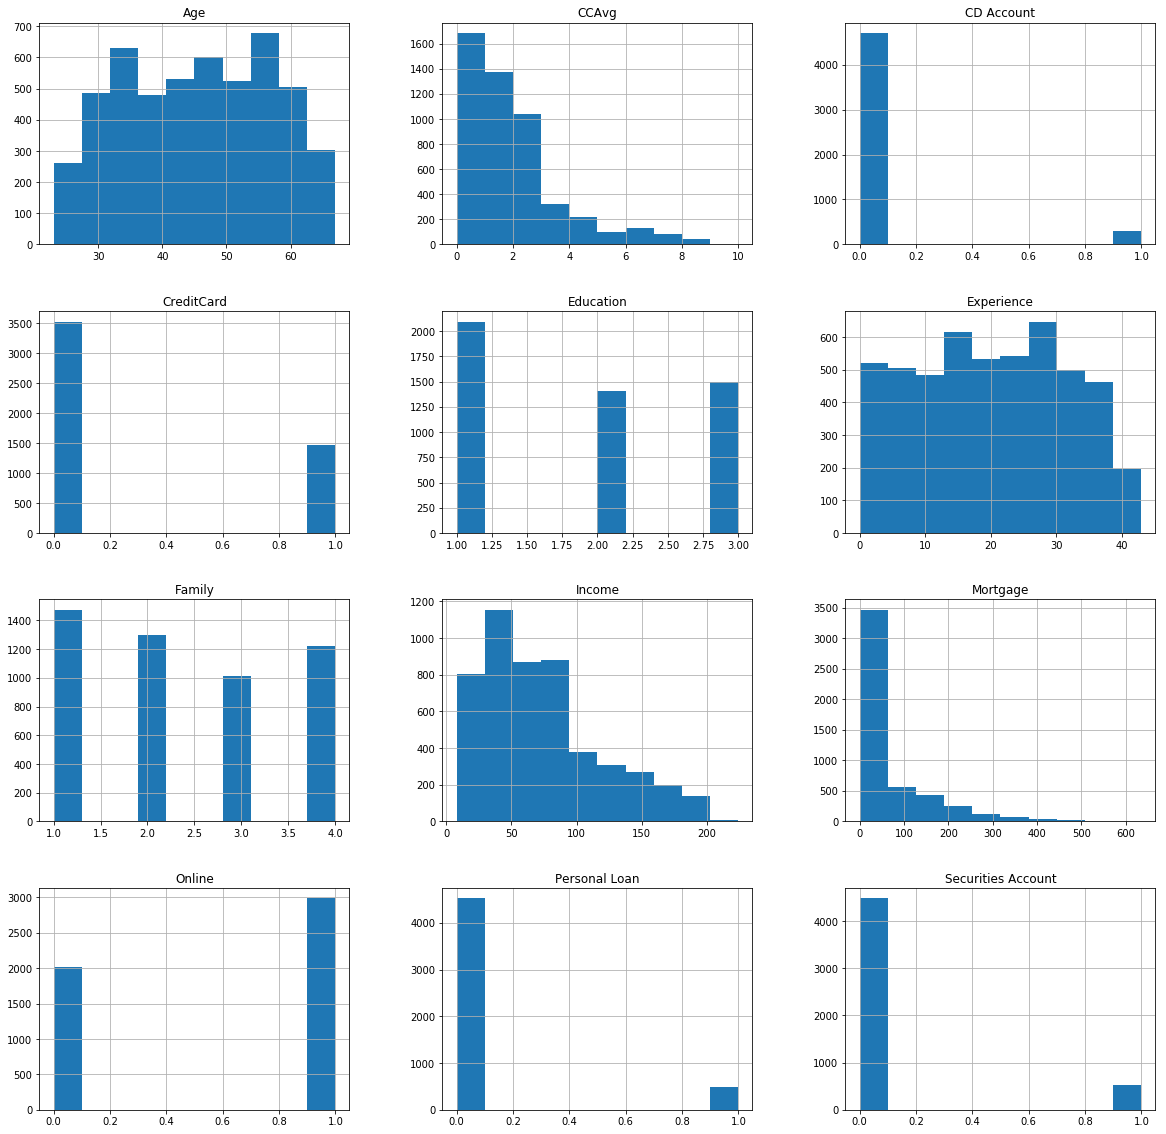

In [127]:
bank_df.hist(figsize=[20,20])

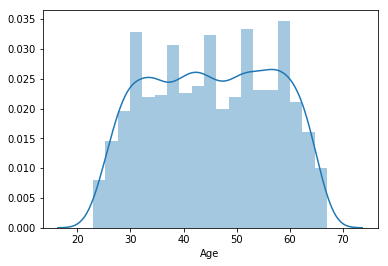

In [128]:
# Age column is close to normal distribution as both mean and median are almost equal around age=45.
sns.distplot(bank_df['Age'])

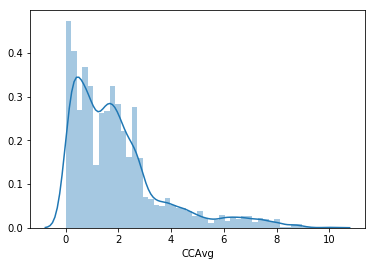

In [129]:
#Avg spending on credit cards is right skewed distribution
sns.distplot(bank_df['CCAvg'])

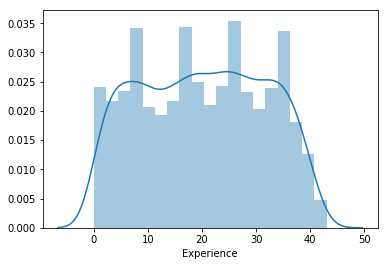

In [130]:
#Experience is close normally distributed aroung mid age
sns.distplot(bank_df['Experience'])

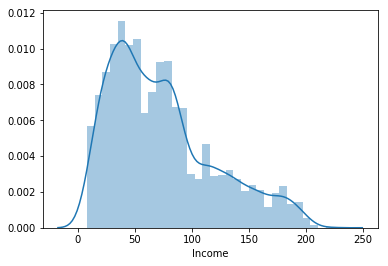

In [131]:
# Income is having a right skewed distribution
sns.distplot(bank_df['Income'])

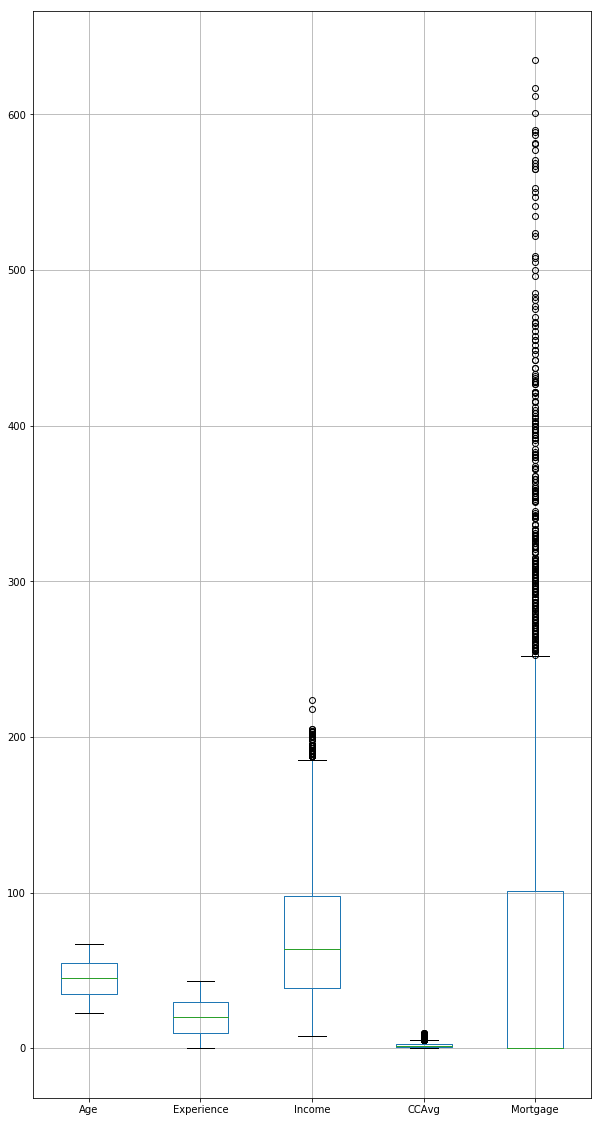

In [132]:
 ## plot box plots for independent feature(features with numerical values) to check the outliers
bank_df.boxplot(column=['Age','Experience','Income','CCAvg','Mortgage'],figsize =(10,20))

##Inference:- 1. Income, Mortgage and CCAvg has outliers. Mortgage has a significant number of data points as outllier.

In [133]:
#Outlier Treatment
# handling outlier for Mortgage feature
Mortgage_q3= bank_df["Mortgage"].quantile(0.75)
Mortgage_q1= bank_df["Mortgage"].quantile(0.25)
Mortgage_iqr= Mortgage_q3- Mortgage_q1
print("Iqr of Mortgage is",Mortgage_iqr)
upper_cutoff = Mortgage_q3 + 1.5*Mortgage_iqr
lower_cutoff = Mortgage_q1 - 1.5*Mortgage_iqr
print("Mortgage_upper cutoff:",upper_cutoff)
print("Mortgage_lower cutoff:",lower_cutoff)

##capping outlier at upper cutoff for Mortgage feature
bank_df["Mortgage"] = bank_df["Mortgage"].where(bank_df["Mortgage"]< upper_cutoff, upper_cutoff )

print("=============================")

# handling outlier for Income feature
Income_q3 = bank_df["Income"].quantile(0.75)
Income_q1 = bank_df["Income"].quantile(0.25)
Income_iqr = Income_q3-Income_q1 # find out iqr for Mortgage feature
print("Income_iqr:",Income_iqr)
Income_upper_cutoff = Income_q3+ 1.5*Income_iqr
Income_lower_cutoff = Income_q1-1.5*Income_iqr
print("Income_upper cutoff:",upper_cutoff)
print("Income_lower cutoff:",lower_cutoff)

#capping outlier at upper cutoff for Income feature
bank_df["Income"] = bank_df["Income"].where(bank_df["Income"]<Income_upper_cutoff,Income_upper_cutoff)

print("=============================")

# handling outlier for CCAvg feature
CCAvg_q3 = bank_df["CCAvg"].quantile(0.75)
CCAvg_q1 = bank_df["CCAvg"].quantile(0.25)
CCAvg_iqr = CCAvg_q3-CCAvg_q1 # find out iqr for CCAvg feature
print("CCAvg_iqr:",CCAvg_iqr)
CCAvg_upper_cutoff = CCAvg_q3+ 1.5*CCAvg_iqr
CCAvg_lower_cutoff = CCAvg_q1-1.5*CCAvg_iqr
print("CCAvg_upper cutoff:",CCAvg_upper_cutoff)
print("CCAvg_lower cutoff:",CCAvg_lower_cutoff)

#capping outlier at upper cutoff for CCAvg feature
bank_df["CCAvg"] = bank_df["CCAvg"].where(bank_df["CCAvg"]<CCAvg_upper_cutoff,CCAvg_upper_cutoff)



Iqr of Mortgage is 101.0
Mortgage_upper cutoff: 252.5
Mortgage_lower cutoff: -151.5
Income_iqr: 59.0
Income_upper cutoff: 252.5
Income_lower cutoff: -151.5
CCAvg_iqr: 1.8
CCAvg_upper cutoff: 5.2
CCAvg_lower cutoff: -2.0


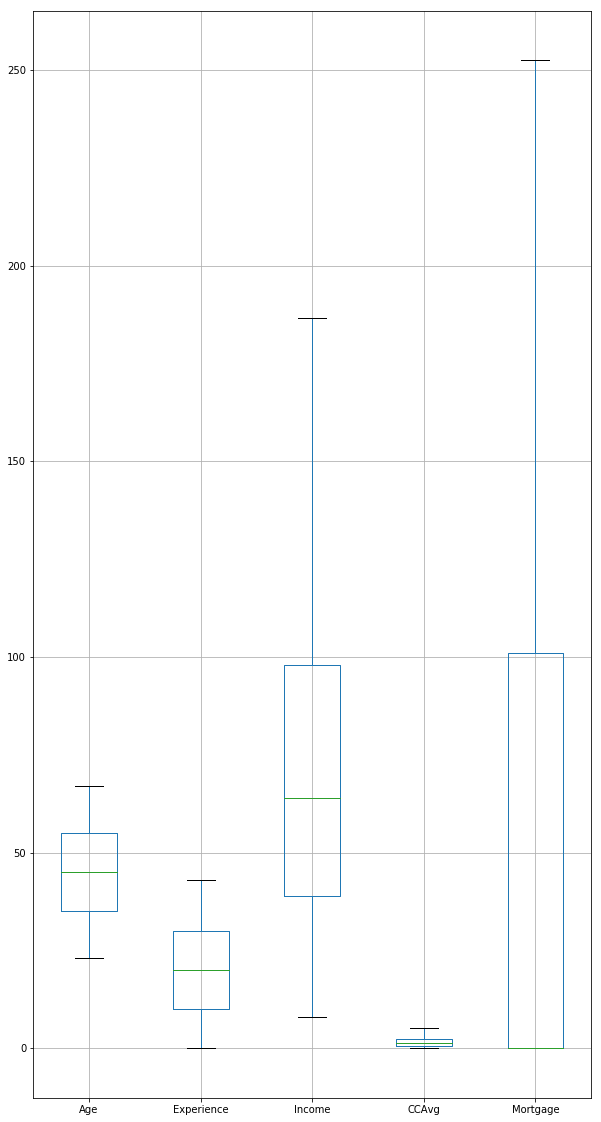

In [134]:
bank_df.boxplot(column=['Age', 'Experience', 'Income','CCAvg','Mortgage'],figsize = (10,20))

In [135]:
bank_df.describe().T
 

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.617400,45.626122,8.0,39.0,64.0,98.0,186.5
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.831338,1.452215,0.0,0.7,1.5,2.5,5.2
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,50.494700,83.005401,0.0,0.0,0.0,101.0,252.5
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


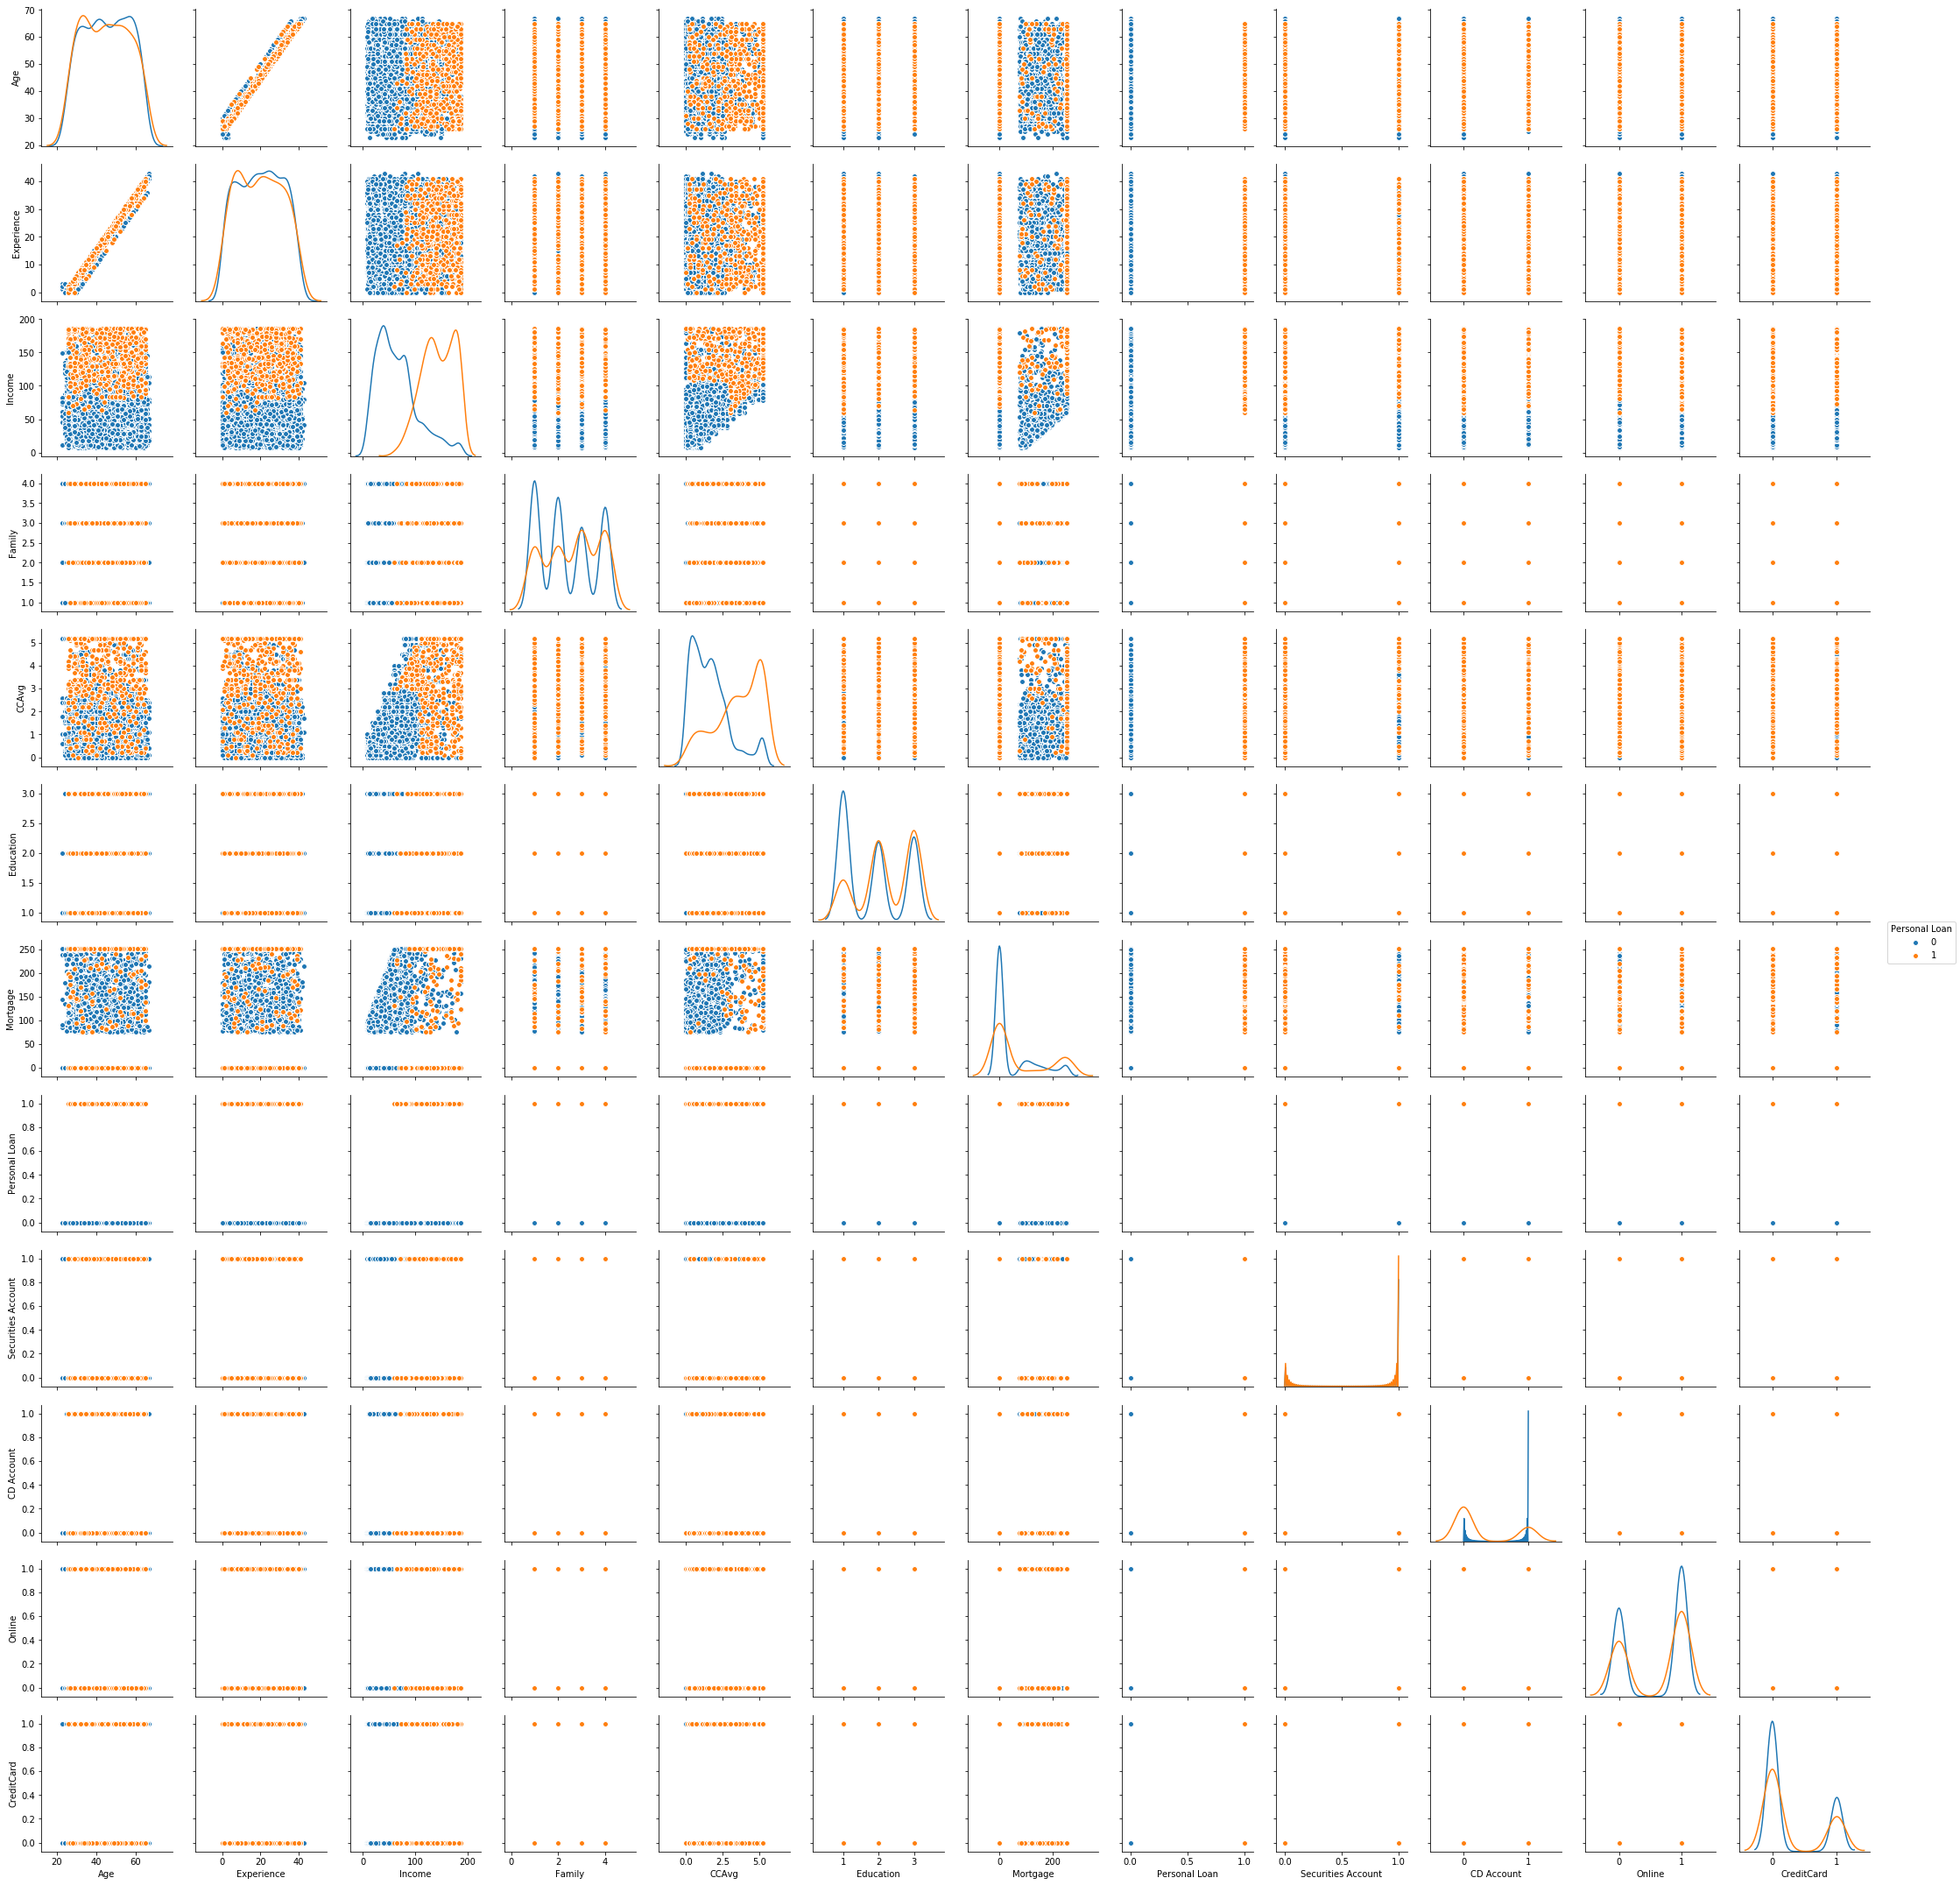

In [136]:
sns.pairplot(bank_df, diag_kind="kde",hue="Personal Loan")
##Inference:-
##1. Age and Experience are positively corelated .
##2. Customers with higher income & higher experience have availed personal loan as per this data set.
##3. Customers Higher Income & higher CCAvg have availed personal loan as per this data set.
##4. Customer with higher mortages & higher income have availed personal loan.

In [137]:
corr= bank_df.corr()
corr

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.993991,-0.054988,-0.046418,-0.052032,0.041334,-0.012033,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.993991,1.000000,-0.046571,-0.051851,-0.050448,0.013919,-0.011046,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.054988,-0.046571,1.000000,-0.157593,0.637869,-0.187403,0.135018,0.504559,-0.002549,0.170194,0.014099,-0.002474
Family,-0.046418,-0.051851,-0.157593,1.000000,-0.103234,0.064929,-0.010862,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052032,-0.050448,0.637869,-0.103234,1.000000,-0.126476,0.068329,0.383306,0.020487,0.143221,-0.003920,-0.006538
Education,0.041334,0.013919,-0.187403,0.064929,-0.126476,1.000000,-0.022005,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012033,-0.011046,0.135018,-0.010862,0.068329,-0.022005,1.000000,0.092989,-0.005577,0.069331,-0.007161,-0.003484
Personal Loan,-0.007726,-0.008304,0.504559,0.061367,0.383306,0.136722,0.092989,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000989,-0.002549,0.019994,0.020487,-0.010812,-0.005577,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.009735,0.170194,0.014110,0.143221,0.013934,0.069331,0.316355,0.317034,1.000000,0.175880,0.278644


0    4520
1     480
Name: Personal Loan, dtype: int64

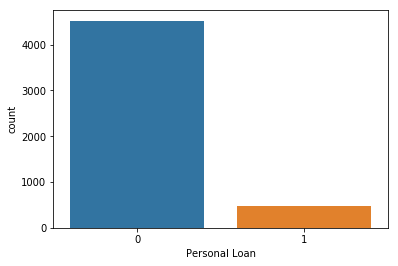

In [138]:
##Question 3 : Get the target column distribution. Your comments?

sns.countplot(bank_df["Personal Loan"])
bank_df['Personal Loan'].value_counts()


##Inference
## This dataset has more number of customers who have not opted for loans.

In [139]:
## Ques 4: Split the data into training and test set in the ratio of 70:30 respectively (2 points)

X= bank_df.drop(["Age","Personal Loan"], axis=1)
Y= bank_df["Personal Loan"]
## Dropping age column as age and experience both has same distribution.


##Split the training and test data into 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test , Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1,stratify=Y)

##Data Standardisation
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [140]:
## Ques 5 .Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans 
import warnings
warnings.filterwarnings("ignore")
from sklearn.neighbors import KNeighborsClassifier

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    iter_acc= accuracy_score(Y_test,pred_i)*100
    iter_err=round(float(100.0-(iter_acc.astype(float))),2)
    error.append(iter_err)
error

[4.0,
 4.67,
 3.47,
 4.47,
 4.0,
 4.93,
 4.53,
 5.4,
 5.0,
 5.33,
 5.2,
 5.33,
 5.13,
 5.2,
 4.93,
 5.0,
 5.0,
 5.33,
 5.2,
 5.4,
 5.2,
 5.53,
 5.27,
 5.47,
 5.2,
 5.53,
 5.53,
 5.73,
 5.6,
 5.67,
 5.53,
 5.73,
 5.67,
 5.8,
 5.87,
 5.87,
 5.67,
 6.0,
 5.87]

Text(0,0.5,'Mean Error')

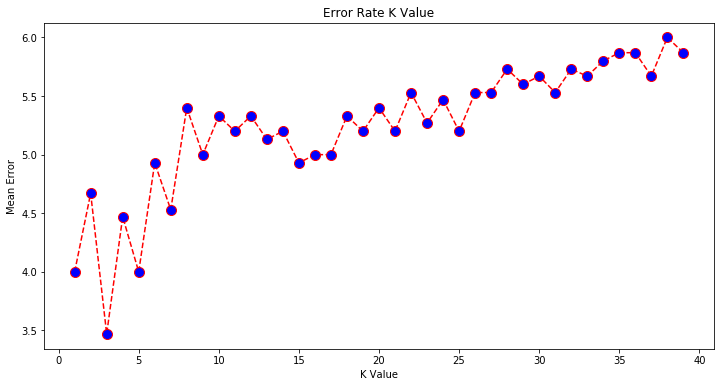

In [141]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

In [142]:
## Value to be chosen fo K is 3 as at this value error is the minimum.
classifier1 = KNeighborsClassifier(n_neighbors=3)  
classifier1.fit(X_train, Y_train) 
Y_pred1 = classifier1.predict(X_test)

In [143]:
Y_pred1

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [144]:
print(confusion_matrix(Y_test, Y_pred1))  
print(classification_report(Y_test, Y_pred1))  
print(accuracy_score(Y_test, Y_pred1))

[[1352    4]
 [  48   96]]
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      1356
          1       0.96      0.67      0.79       144

avg / total       0.97      0.97      0.96      1500

0.9653333333333334


In [145]:
## Logistic Regression
model = LogisticRegression()
model.fit(X_train, Y_train)
prediction=model.predict(X_test)


In [146]:
print(classification_report(Y_test, prediction))
print("======================")
print("Accuracy score is ",accuracy_score(Y_test, prediction))
print("======================")
print(confusion_matrix(Y_test, prediction))

             precision    recall  f1-score   support

          0       0.96      0.99      0.97      1356
          1       0.84      0.62      0.72       144

avg / total       0.95      0.95      0.95      1500

Accuracy score is  0.9526666666666667
[[1339   17]
 [  54   90]]


In [147]:
#NaiveBayes
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB = GNB.fit(X_train, Y_train)
y_pred_GNB=GNB.predict(X_test)
y_pred_GNB

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [148]:
print(classification_report(Y_test, y_pred_GNB))
print("======================")
print("Accuracy score is ",accuracy_score(Y_test, y_pred_GNB))
print("======================")
print(confusion_matrix(Y_test, y_pred_GNB))

             precision    recall  f1-score   support

          0       0.96      0.93      0.95      1356
          1       0.52      0.67      0.58       144

avg / total       0.92      0.91      0.91      1500

Accuracy score is  0.908
[[1266   90]
 [  48   96]]


In [149]:
#Out of these 3 models, choosing KNN which has highest overall model accuracy & better recall & precision too when 
# compared with logistic & NaiveBayes.  However, Recall rate of Naive Bayes is debatable compared to other 2 models.
## Hence KNN(k=3) model is the best model for this classification.